Trying to look for trends by evolutionary status

**Caveat:** Looks like all the stars are post-main-sequence. Really ought to have main-sequence comparison point

We're taking a catalog of stars whose evolutionary status has been determined, pulling data on those stars out of our flickery catalog, and seeing if there are trends based on evo status.

In short, subgiants (which are fresh off the main sequence) are different from the further-evolved stars, but those stars aren't very different from each other.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from base import *

In [3]:
evo_data = np.loadtxt("evolutionary_status/table1.dat", dtype=np.string_, unpack=True)
KIC = evo_data[0].astype(np.int32)
Dnu, e_Dnu, DPi1, e_DPi1 = evo_data[1:5].astype(np.float64)
Stat = evo_data[5]
Mass, e_Mass = evo_data[6:].astype(np.float64)

phi_vals = fit_Φ(catalog['loggH'],
                 catalog['TeffH'],
                 catalog['MH'],
                 catalog['F8'])

In [4]:
phi_lists = dict()
logg_lists = dict()
f8_lists = dict()
for stat in Stat:
    phi_lists[stat] = []
    logg_lists[stat] = []
    f8_lists[stat] = []

missing_count = 0
for i in range(len(KIC)):
    if KIC[i] not in catalog['KIC']:
#         print("{} missing".format(KIC[i]))
        missing_count += 1
        continue
    
    phi = phi_vals[catalog['KIC'] == KIC[i]]
    logg = catalog['loggH'][catalog['KIC'] == KIC[i]]
    f8 = catalog['F8'][catalog['KIC'] == KIC[i]]
    phi_lists[Stat[i]].append(phi)
    logg_lists[Stat[i]].append(logg)
    f8_lists[Stat[i]].append(f8)

print(f"{missing_count} stars from evo catalog not in flicker catalog")

449 stars from evo catalog not in flicker catalog


S  , n= 36, μ_phi=0.918, σ_phi=0.082, μ_logg=3.854, σ_logg=0.168
R  , n=264, μ_phi=1.491, σ_phi=0.217, μ_logg=2.930, σ_logg=0.298
f  , n= 11, μ_phi=1.464, σ_phi=0.261, μ_logg=2.328, σ_logg=0.095
C  , n=293, μ_phi=1.775, σ_phi=0.215, μ_logg=2.468, σ_logg=0.118
p2 , n= 26, μ_phi=1.577, σ_phi=0.206, μ_logg=2.644, σ_logg=0.101
0  , n=0
A  , n= 56, μ_phi=1.394, σ_phi=0.267, μ_logg=2.492, σ_logg=0.232
?  , n=  1, μ_phi=1.564, σ_phi=0.000, μ_logg=2.332, σ_logg=0.000


/home/sam/.anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


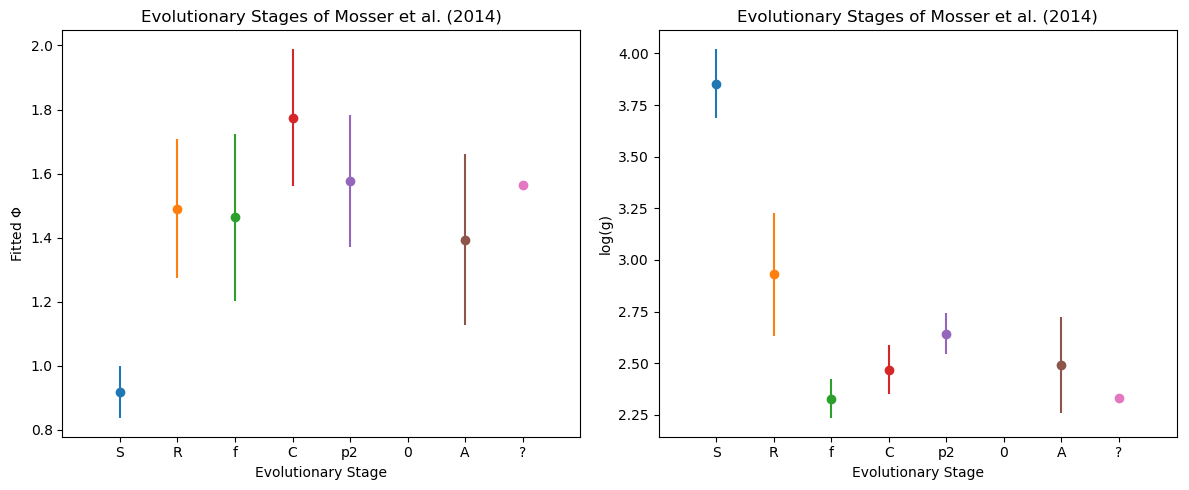

In [5]:
counter = 0
categories = ['S', 'R', 'f', 'C', 'p2', '0', 'A', '?']
for key in categories:
    counter += 1
    key = np.array([key], dtype=np.string_)[0]
    if key not in phi_lists.keys():
        print("{:3}, n=0".format(key.decode("UTF-8")))
        continue
    
    n = len(phi_lists[key])
    mean_phi = np.mean(phi_lists[key])
    std_phi = np.std(phi_lists[key])
    mean_logg = np.mean(logg_lists[key])
    std_logg = np.std(logg_lists[key])
    print("{:3}, n={:3d}, μ_phi={:.3f}, σ_phi={:.3f}, μ_logg={:.3f}, σ_logg={:.3f}".format(
        key.decode("UTF-8"), n, mean_phi, std_phi, mean_logg, std_logg))
    plt.subplot(121)
    plt.errorbar(counter, mean_phi, yerr=std_phi, fmt='o')
    
    plt.subplot(122)
    plt.errorbar(counter, mean_logg, yerr=std_logg, fmt='o')

plt.subplot(121)
plt.xlim(0, counter+1)
plt.xlabel("Evolutionary Stage")
plt.ylabel("Fitted $\Phi$")
plt.title("Evolutionary Stages of Mosser et al. (2014)")
plt.xticks(range(1, 1+len(categories)), categories)

plt.subplot(122)
plt.xlim(0, counter+1)
plt.xlabel("Evolutionary Stage")
plt.ylabel("log(g)")
plt.title("Evolutionary Stages of Mosser et al. (2014)")
plt.xticks(range(1, 1+len(categories)), categories)

plt.gcf().set_size_inches(12, 5)
plt.tight_layout()

plt.show()